# 1. Business understanding
In this notebook we analyze the trend of the salaries from 2011 to 2020, and we try to find an answer to the following questions

- ### Question 1: What is the global trend of the salaries?
- ### Question 2: What is the US trend of the salaries?
- ### Question 3: What is the trend of the salaries in Italy?

# 2. Variables initialization

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from currency_converter import CurrencyConverter
from datetime import date
%matplotlib inline

Variables to be used later on to filter/normalize data

In [31]:

c = CurrencyConverter()
salary_filter_values = ['Unemployed', 'Rather not say', 'Student / Unemployed', 'Other (please specify)']
salary_range = {
    'min': 20000,
    'max': 40000,
    'step': 20000
}

replacement_values_2016 = {
    'Less than $10,000': '<$20,000',
    '$10,000 - $20,000': '<$20,000',
    '$20,000 - $30,000': '$20,000 - $40,000',
    '$30,000 - $40,000': '$20,000 - $40,000',
    '$40,000 - $50,000': '$40,000 - $60,000',
    '$50,000 - $60,000': '$40,000 - $60,000',
    '$60,000 - $70,000': '$60,000 - $80,000',
    '$70,000 - $80,000': '$60,000 - $80,000',
    '$80,000 - $90,000': '$80,000 - $100,000',
    '$90,000 - $100,000': '$80,000 - $100,000',
    '$100,000 - $110,000': '$100,000 - $120,000',
    '$110,000 - $120,000': '$100,000 - $120,000',
    '$120,000 - $130,000': '$120,000 - $140,000',
    '$130,000 - $140,000': '$120,000 - $140,000',
    '$140,000 - $150,000': '>$140,000',
    '$150,000 - $160,000': '>$140,000',
    '$160,000 - $170,000': '>$140,000',
    '$170,000 - $180,000': '>$140,000',
    '$180,000 - $190,000': '>$140,000',
    '$190,000 - $200,000': '>$140,000',
    'More than $200,000': '>$140,000',
}

# dict mapping currency response into code
currency_map = {
    'U.S. dollars ($)': 'USD',
    'Euros (€)': 'EUR',
    'British pounds sterling (£)': 'GBP',
    'Indian rupees (?)': 'INT',
    'Canadian dollars (C$)': 'CAD',
    'Polish zloty (zl)': 'PLN',
    'Australian dollars (A$)': 'AUD',
    'Swedish kroner (SEK)': 'SEK',
    'Russian rubles (?)': 'RUB',
    'Brazilian reais (R$)': 'BRL',
    'Swiss francs': 'CHF',
    'Japanese yen (¥)': 'JPY',
    'Chinese yuan renminbi (¥)': 'CNY',
    'Mexican pesos (MXN$)': 'MXN',
    'South African rands (R)': 'ZAR',
    'Singapore dollars (S$)': 'SGD',
    'Bitcoin (btc)': 'BTC'
}

range_to_numeric = {
'<$20,000': 10000,
'$20,000 - $40,000': 30000,
'$40,000 - $60,000': 50000,
'$60,000 - $80,000': 70000,
'$80,000 - $100,000': 90000,
'$100,000 - $120,000': 110000,
'$120,000 - $140,000': 120000,
'>$140,000': 150000,
}

lambda_range_to_numeric = lambda x: range_to_numeric[x]

df_dict = {} # dict containing all the filtered data by year

# 3. Gather data
Import all the CSVs

In [32]:

dict_raw_df = dict()
# 2011 and 2012 CSVs uses ISO-8859-1 encoding
dict_raw_df[2011] = pd.read_csv('./surveys/2011_Stack_Overflow_Survey_Results.csv', encoding = "ISO-8859-1", skiprows=[1])
dict_raw_df[2012] = pd.read_csv('./surveys/2012_Stack_Overflow_Survey_Results.csv', encoding = "ISO-8859-1", skiprows=[1])

dict_raw_df[2013] = pd.read_csv('./surveys/2013_Stack_Overflow_Survey_Responses.csv', skiprows=[1])
dict_raw_df[2014] = pd.read_csv('./surveys/2014_Stack_Overflow_Survey_Responses.csv', skiprows=[1])

# in 2015 CSV the header is the second row
dict_raw_df[2015] = pd.read_csv('./surveys/2015_Stack_Overflow_Developer_Survey_Responses.csv', header=1)

dict_raw_df[2016] = pd.read_csv('./surveys/2016_Stack_Overflow_Survey_Responses.csv')
dict_raw_df[2017] = pd.read_csv('./surveys/2017_survey_results_public.csv')
dict_raw_df[2018] = pd.read_csv('./surveys/2018_survey_results_public.csv')
dict_raw_df[2019] = pd.read_csv('./surveys/2019_survey_results_public.csv')
dict_raw_df[2020] = pd.read_csv('./surveys/2020_survey_results_public.csv')

/var/folders/tb/_c4k48m10913x6yv5_y7qgkw0000gn/T/ipykernel_98727/1376658122.py:6: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  dict_raw_df[2013] = pd.read_csv('./surveys/2013_Stack_Overflow_Survey_Responses.csv', skiprows=[1])
/var/folders/tb/_c4k48m10913x6yv5_y7qgkw0000gn/T/ipykernel_98727/1376658122.py:10: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  dict_raw_df[2015] = pd.read_csv('./surveys/2015_Stack_Overflow_Developer_Survey_Responses.csv', header=1)
/var/folders/tb/_c4k48m10913x6yv5_y7qgkw0000gn/T/ipykernel_98727/1376658122.py:14: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option

# 4. Clean data
Save the data in new dataframes filtering only the columns that we need

The data from 2011 to 2016 has only the range of the salary. We apply the lambda 'lambda_range_to_numeric' and transform the range to the median

### Filter 2011, 2012, 2013 data

In [33]:

dict_df_to_normalize = [2011, 2012, 2013]

for year in dict_df_to_normalize:
    new_df = pd.DataFrame()

    # select salary column
    new_df['Salary'] = dict_raw_df[year]['Including bonus, what is your annual compensation in USD?']
    
    # remove all respondents that do not have a salary
    new_df = new_df[~new_df['Salary'].isin(salary_filter_values)].dropna().reset_index(drop=True)
    
    # since we only have a range, we use the median of that range to transform it in a numeric column
    new_df['NumericSalary'] = new_df['Salary'].apply(lambda_range_to_numeric)
    
     # select country column
    new_df['Country'] = dict_raw_df[year]['What Country or Region do you live in?']
    
    # save filtered data in our dict
    df_dict[year] = new_df

### Filter 2014 data

In [34]:
new_df = pd.DataFrame()

# select salary column
new_df['Salary'] = dict_raw_df[2014]['Including bonus, what is your annual compensation in USD?']

# remove all respondents that do not have a salary
new_df = new_df[~new_df['Salary'].isin(salary_filter_values)].dropna().reset_index(drop=True)

# since we only have a range, we use the median of that range to transform it in a numeric column
new_df['NumericSalary'] = new_df['Salary'].apply(lambda_range_to_numeric)

 # select country column
new_df['Country'] = dict_raw_df[2014]['What Country do you live in?']

# save filtered data in our dict
df_dict[2014] = new_df

### Filter 2015 data
In 2015 data the ranges of the salary are different from the previous one. We replace them with the previous ones by sacrificing some accuracy

In [35]:
new_df = pd.DataFrame()

# select salary column
new_df['Salary'] = dict_raw_df[2015]['Compensation']

# remove all respondents that do not have a salary
new_df = new_df[~new_df['Salary'].isin(salary_filter_values)].dropna().reset_index(drop=True)

# select country column
new_df['Country'] = dict_raw_df[2015]['Country']

# since the ranges are different in 2015 data, we replace it with the previous ranges
new_df.replace(['Less than $20,000', '$140,000 - $160,000', 'More than $160,000'], ['<$20,000', '>$140,000','>$140,000'], inplace=True)

# since we only have a range, we use the median of that range to transform it in a numeric column
new_df['NumericSalary'] = new_df['Salary'].apply(lambda_range_to_numeric)

# save filtered data in our dict
df_dict[2015] = new_df

### Filter 2016 data
In 2016 data we have more detailed ranges but different from the previous one. We apply the same logic we did for 2015 data but using a different dict for mapping

In [36]:
new_df = pd.DataFrame()

# select salary column
new_df['Salary'] = dict_raw_df[2016]['salary_range']

 # remove all respondents that do not have a salary
new_df = new_df[~new_df['Salary'].isin(salary_filter_values)].dropna().reset_index(drop=True)

# select country column
new_df['Country'] = dict_raw_df[2016]['country']

# since the ranges are different in 2016 data, we replace it with the previous ranges
new_df.replace(replacement_values_2016, inplace=True)

# since we only have a range, we use the median of that range to transform it in a numeric column
new_df['NumericSalary'] = new_df['Salary'].apply(lambda_range_to_numeric)

# save filtered data in our dict
df_dict[2016] = new_df

### Filter 2017, 2018 data

In 2017 and 2018 data, we do not have a range of salary but a numeric value. Also we need to convert the salaries since they are not in USD anymore, but in the currency of the respondent

In [37]:
# dict used in the lambda to map the numeric value to the previous ranges
salary_range = {
    'min': 20000, # lower bound of the ranges
    'max': 140000, # higher bound of the ranges
    'step': 20000 # step size of the ranges
}

# lambda that converts a numeric value into the range based on salary_range
salary_to_range = lambda x: '<{:,}'.format(salary_range['min']) if x <= salary_range['min'] else '>{:,}'.format( salary_range['max']) if x >= salary_range['max'] else '${:,.0f} - ${:,.0f}'.format(x-x%salary_range['step'], x+salary_range['step']-x%salary_range['step'])

# lambda that transforms currency response into code, needed for the converter. Return NaN if symbol is not present in the map
currency_to_symbol = lambda x: currency_map.get(x, pd.NA)


def salary_to_usd (salary, currency_symbol, year):
    '''
    returns the salary converted to USD with the rate of the year
    if no conversion is available on the rate of the year, uses current rates
    if no conversion is possible, returns 0
    
    input:
            salary: number to convert
            currency_symbol: input salary currency
            year: year used for the currency rate
            
    output:
            converted_salary: salary in USD 
    '''
    try:
        return c.convert(salary, currency_symbol, 'USD', date=date(year, 1, 11))
    except:
        try:
            return c.convert(salary, currency_symbol, 'USD')
        except:
            return 0

dict_df_to_normalize = [2017, 2018]

for year in dict_df_to_normalize:
    new_df = pd.DataFrame()

    # unconverted salary in local currency
    new_df['RawSalary'] = pd.to_numeric(dict_raw_df[year]['Salary'], errors='coerce')
    
    # select country column
    new_df['Country'] = dict_raw_df[year]['Country']
    
    # select currency column
    new_df['CurrencySymbol'] = dict_raw_df[year]['Currency'].apply(currency_to_symbol)

    # convert salary to USD
    new_df['NumericSalary'] = new_df.apply(lambda x: salary_to_usd(x.RawSalary, x.CurrencySymbol, year), axis=1)
    
    # drop unnecessary columns for our analysis
    new_df = new_df.drop(columns=['RawSalary', 'CurrencySymbol'])
    
    # remove nan values
    new_df = new_df.dropna()
    
    # remove rows with no salaries
    new_df = new_df[new_df['NumericSalary'] > 0]
    
    # remove outliners or wrong data
    new_df = new_df[new_df['NumericSalary'] < 2000000]
    
    new_df.reset_index(drop=True)


    # show salaries as a range
    new_df['Salary'] = new_df['NumericSalary'].apply(salary_to_range)
    df_dict[year] = new_df

### Filter 2019, 2020 data
In 2019 and 2020 data, we have the same problem as in the previous ones. We need to convert to USD based on the currency rate

In [38]:
dict_df_to_normalize = [2019, 2020]

for year in dict_df_to_normalize:
    new_df = pd.DataFrame()

    # unconverted salary in local currency
    new_df['RawSalary'] = dict_raw_df[year]['CompTotal']
    
    # select country column
    new_df['Country'] = dict_raw_df[year]['Country']
    
    # select currency column
    new_df['CurrencySymbol'] = dict_raw_df[year]['CurrencySymbol']
    
    # convert salary to USD
    new_df['NumericSalary'] = new_df.apply(lambda x: salary_to_usd(x.RawSalary, x.CurrencySymbol, year), axis=1)
    
    # drop unnecessary columns for our analysis
    new_df = new_df.drop(columns=['RawSalary', 'CurrencySymbol'])
    
    # remove nan values
    new_df = new_df.dropna()
    new_df = new_df[new_df['NumericSalary'] > 0]

    #remove outliners or wrong data
    new_df = new_df[new_df['NumericSalary'] < 2000000]
    new_df.reset_index(drop=True)

    # show salaries as a range
    new_df['Salary'] = new_df['NumericSalary'].apply(salary_to_range)
    df_dict[year] = new_df

# 5. Visualize
### Plot all ranges of the salaries from 2011 to 2020

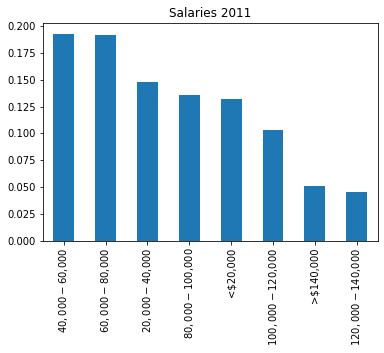

In [39]:
(df_dict[2011]['Salary'].value_counts()/df_dict[2011].shape[0]).plot(kind="bar");
plt.title("Salaries 2011"); 

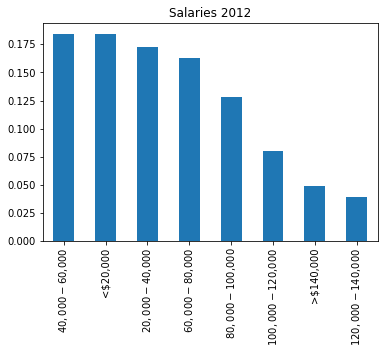

In [40]:
(df_dict[2012]['Salary'].value_counts()/df_dict[2012].shape[0]).plot(kind="bar");
plt.title("Salaries 2012");

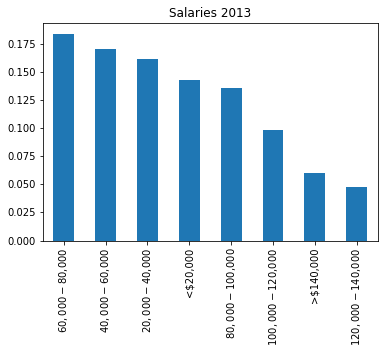

In [41]:
(df_dict[2013]['Salary'].value_counts()/df_dict[2013].shape[0]).plot(kind="bar");
plt.title("Salaries 2013");

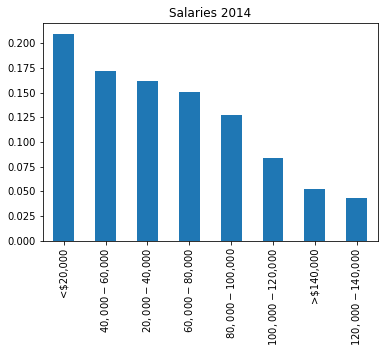

In [42]:
(df_dict[2014]['Salary'].value_counts()/df_dict[2014].shape[0]).plot(kind='bar');
plt.title("Salaries 2014");

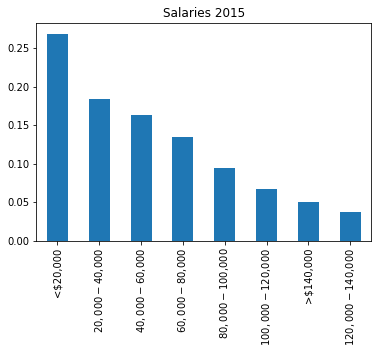

In [43]:
(df_dict[2015]['Salary'].value_counts()/df_dict[2015].shape[0]).plot(kind='bar');
plt.title("Salaries 2015");

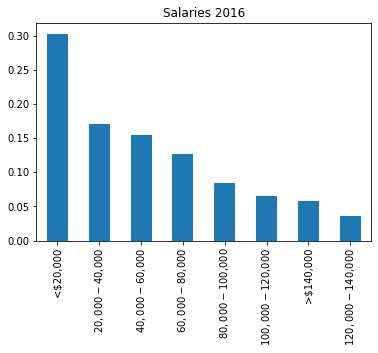

In [44]:
(df_dict[2016]['Salary'].value_counts()/df_dict[2016].shape[0]).plot(kind='bar');
plt.title("Salaries 2016");

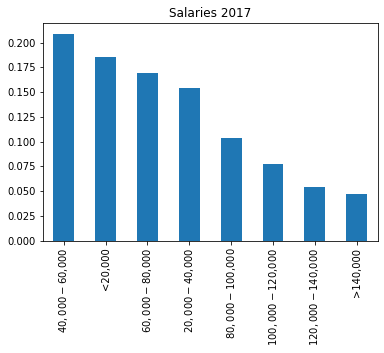

In [45]:
(df_dict[2017]['Salary'].value_counts()/df_dict[2017].shape[0]).plot(kind='bar');
plt.title("Salaries 2017");

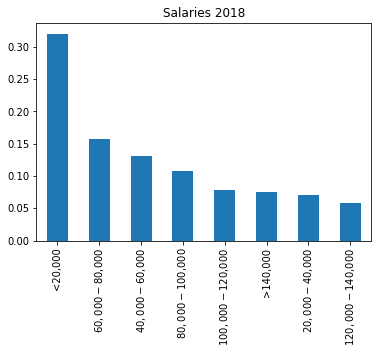

In [46]:
(df_dict[2018]['Salary'].value_counts()/df_dict[2018].shape[0]).plot(kind='bar');
plt.title("Salaries 2018");

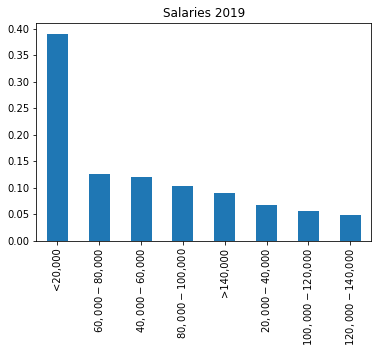

In [47]:
(df_dict[2019]['Salary'].value_counts()/df_dict[2019].shape[0]).plot(kind='bar');
plt.title("Salaries 2019");

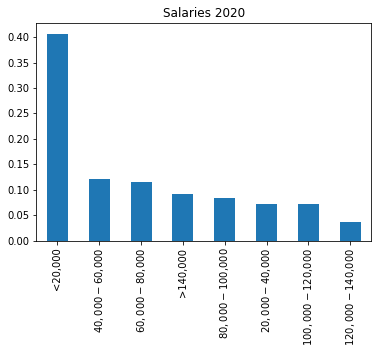

In [48]:
(df_dict[2020]['Salary'].value_counts()/df_dict[2020].shape[0]).plot(kind='bar');
plt.title("Salaries 2020");

In [49]:
average_salaries_df = pd.DataFrame()
average_salaries_us_df = pd.DataFrame()
average_salaries_italy_df = pd.DataFrame()

median_salaries_df = pd.DataFrame()
median_salaries_us_df = pd.DataFrame()
median_salaries_italy_df = pd.DataFrame()

for key, value in df_dict.items():
    # calculate all the averages
    average_salaries_df[key] = [value['NumericSalary'].mean()]
    average_salaries_italy_df[key] = [value[value['Country'] =='Italy']['NumericSalary'].mean()]
    average_salaries_us_df[key] = [value[value['Country'].isin(['United States', 'United States of America'])]['NumericSalary'].mean()]
    
    # calculate all the medians
    median_salaries_df[key] = [value['NumericSalary'].median()]
    median_salaries_italy_df[key] = [value[value['Country'] =='Italy']['NumericSalary'].median()]
    median_salaries_us_df[key] = [value[value['Country'].isin(['United States', 'United States of America'])]['NumericSalary'].median()]


# 6. Evaluation

### Calculate averages and median values
We would like to see in a more global view the trend of the salaries
I decided to pick the global, US and Italian trend

### Question 1: What is the global trend of the salaries?
The average and the median has remained stale from 2011 to 2020

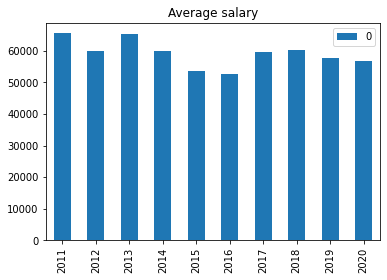

In [50]:
average_salaries_df.T.plot(kind='bar');
plt.title("Average salary");

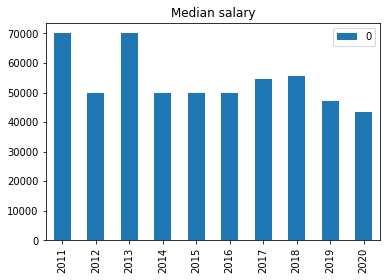

In [51]:
median_salaries_df.T.plot(kind='bar');
plt.title("Median salary");

### Question 2: What is the US trend of the salaries?
There was an increase of the salaries in 2017 with a stable increase in the following years

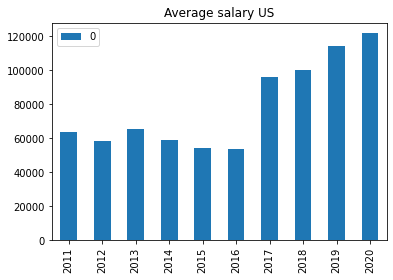

In [52]:
average_salaries_us_df.T.plot(kind='bar');
plt.title("Average salary US");

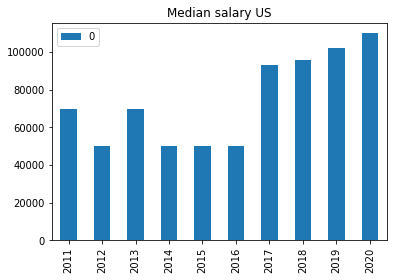

In [53]:
median_salaries_us_df.T.plot(kind='bar');
plt.title("Median salary US");

### Question 3: What is the trend of the salaries in Italy?
There was a drop of salaries in 2017

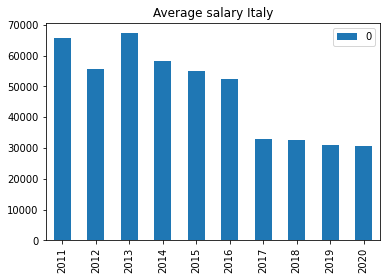

In [54]:
average_salaries_italy_df.T.plot(kind='bar');
plt.title("Average salary Italy");

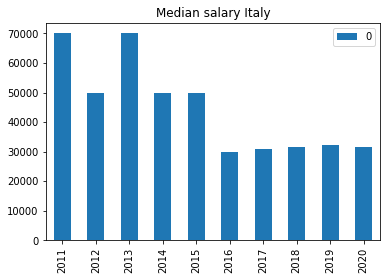

In [55]:
median_salaries_italy_df.T.plot(kind='bar');
plt.title("Median salary Italy");

# 7. Conclusion
We can see that the global trend of the salaries has been stable.
But that doesn't mean that's true for all countries: for example in US there was a clear up-trend from 2017 onward, while in Italy there was a big drop in salaries in 2017.